<a href="https://colab.research.google.com/github/jparkgit/NumPy/blob/master/HW3_Pytorch_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1903055, 생명과학과, 박지현

HW3: Solve exercise 1.1, 1.2, 1.3, 2.1, and 3.1.

[과제함](https://cyber.ewha.ac.kr/mod/assign/view.php?id=2083598)

Due 10/26 목 23:59


---



In [1]:
#!pip install ISLP
!pip install statsmodels
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [46]:
import torch
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

#1. Simple Linear Regression using Boston data

## Exercise 1.1:

Do the estimatsion procedure using `torch.nn.Linear(1,1, bias=True)`. Answer the following questions.

i. Calculate $\widehat{Y}$ when `lstat`s are given by 5, 10, 15, respectively.

ii. Calculate $R^2$.

~iii. Calculate AIC.~


### 1.1 풀이

2> Second method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=True)` to define the model.
- Do not use `torch.optim.SGD` to do gradient descent.

For `torch.nn.Linear(1,1, bias=True)`, we need an X of 1-dimension.

In [33]:
Boston = load_data("Boston")


(506,)


In [ ]:
lstat = np.array(Boston["lstat"])
# standardization of lstat
lstat = (lstat-np.mean(lstat))/np.std(lstat)
n = Boston.shape[0]
ones = np.ones([n])
# X1 = X with dimension of 1
X1 = lstat
print(X1.shape)
X1.reshape([506,1])

In [43]:
Xtemp = torch.tensor(Boston["lstat"], dtype = torch.float32)
# X 정규화
X = (Xtemp - Xtemp.mean())/ Xtemp.std()
y = torch.tensor(Boston["medv"],dtype = torch.float32)
print(X.shape, y.shape)

torch.Size([506]) torch.Size([506])


In [44]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
dataset = TensorDataset(X.reshape([-1,1]), y.reshape([-1,1])) # X shape :[n,1]
trainloader = DataLoader(dataset= dataset, batch_size = 5, shuffle = True)

In [45]:
model = torch.nn.Linear(1,1, bias = True)

def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

my_optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

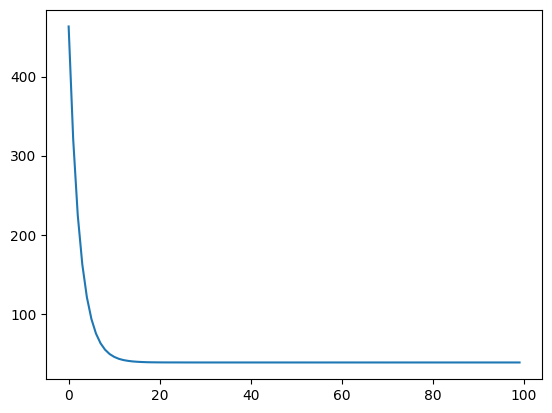

In [47]:
history = []
epochs = 100
n = X.shape[0]

for _ in range(epochs):
    epoch_loss = 0
    for xx, yy in trainloader:

        yhat = model(xx)
        loss = loss_ftn(yhat, yy)
        epoch_loss = epoch_loss + loss * len(yy)


        loss.backward()

        my_optimizer.step()
        my_optimizer.zero_grad()


    history.append(epoch_loss.item()/n)

plt.plot(history)


In [66]:
# lstat = 5 일 때
myx = torch.tensor([(5.0 - Xtemp.mean())/ Xtemp.std()])
#myx.shape
model(myx)

tensor([29.7921], grad_fn=<ViewBackward0>)

In [68]:
# lstat = 10 일 때
myx = torch.tensor([(10.0 - Xtemp.mean())/ Xtemp.std()])
#myx.shape
model(myx)

tensor([25.0452], grad_fn=<ViewBackward0>)

In [70]:
# lstat = 15 일 때
myx = torch.tensor([(15.0 - Xtemp.mean())/ Xtemp.std()])
#myx.shape
model(myx)

tensor([20.2984], grad_fn=<ViewBackward0>)

In [73]:
from torchmetrics.regression import R2Score
r2score = R2Score()
#r2score(preds, target)

## Exercise 1.2:

Do the estimatsion procedure using `torch.nn.Linear(2,1, bias=False)`.Answer the following questions.

i. Calculate $\widehat{Y}$ when `lstat`s are given by 5, 10, 15, respectively.

ii. Calculate $R^2$.

~iii. Calculate AIC.~

# Exercise 1.3:

Do the estimatsion procedure using `torch.nn.Linear(1,1, bias=False)` and an additional bias parameter defined by `torch.tensor`. Model itself should be the same as in Exercise 1.1 and 1.2. (Caution: However, the estimated parameter(s) should not be the exactly the same due to the randomness in the parameter initialization and batch learning.)

Answer the following questions.

i. Calculate $\widehat{Y}$ when `lstat`s are given by 5, 10, 15, respectively.

ii. Calculate $R^2$.

~iii. Calculate AIC.~

#2. Multiple regression

## 2.1 Exercise:

Using `Boston` data answer the following questions.

(a) Using pytorch, calculate the train MSE of the following model:

`medv ~ age + lstat`

(b) Using pytorch, calculate the train MSE of the following model:

`medv ~ age + lstat + lstat**2`

(c) Calculate $R^2$ of each model in (a) and (b).

(d) Repeat (a) and (b) by making use of 70% of data as train set and the remaining 30% as test set.


#3. Qualitative predictors

## 3.1 Exercise:

Using `Carseats` data answer the following questions.

(a) Using pytorch, calculate the train MSE of the following model:

`Sales ~ Advertising + ShelveLoc`

(b) Using pytorch, calculate the train MSE of the following model:

`Sales ~ Advertising`

(c) Calculate $R^2$ of each model in (a) and (b).

(d) Repeat (a) and (b) by making use of 70% of data as train set and the remaining 30% as test set.